# Taxi Fare Prediction
## Problem Statement
This case study is to predict the taxi fare for a taxi ride in New York City from a given pickup point to the agreed dropoff location. Decision tree and Random Forest regressor is used for the fare prediction.

### Data Definition
unique_id: Unique identifier or key for each record in the dataset - (string)

date_time_of_pickup: time when the ride started - (timestamp)

longitude_of_pickup: Longitude of the taxi ride pickup point - (float) - (Numerical)

latitude_of_pickup: Latitude of the taxi ride pickup point - (float) - (Numerical)

longitude__of_dropoff: Longitude of the taxi ride dropoff point - (float) - (Numerical)

latitude_of_dropoff: Latitude of the taxi ride dropoff point - (float) - (Numerical)

no_of_passenger: count of the passengers during the ride - (integer) - (Numerical)

amount: (target variable)dollar amount of the cost of the taxi ride

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [2]:
df=pd.read_csv('TaxiFare.csv',parse_dates=[2])
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


### Data Analysis and Preparation
	
Data preparation is the process of cleaning and transforming raw data before building predictive models.

Here, we analyze and perform the following tasks:
1. Check data types. Ensure your data types are correct.
2. We need to change the data types as per requirement If they are not as per business definition
3. Go through the summary statistics
4. Distribution of variables
5. Study the correlation
6. Detect outliers from the data
7. Look for the missing values

### Understanding the Dataset

In [3]:
df1=df.copy()
df1.shape

(50000, 8)

In [4]:
df1.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

### Checking for Data Types

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             50000 non-null  object             
 1   amount                50000 non-null  float64            
 2   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   50000 non-null  float64            
 4   latitude_of_pickup    50000 non-null  float64            
 5   longitude_of_dropoff  50000 non-null  float64            
 6   latitude_of_dropoff   50000 non-null  float64            
 7   no_of_passenger       50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 3.1+ MB


In [6]:
df1.dtypes.value_counts()

float64                5
object                 1
datetime64[ns, UTC]    1
int64                  1
dtype: int64

<b> 1. For getting the statistical summary of numerical variables we use the describe()

In [7]:
df1.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


- The above output displays the summary statistics of all the numeric variables like mean, median, standard deviation, minimum, and the maximum values, the first and third quantiles.

- We can see that the no_of_passenger ranges from 0 to 6, with mean 1.66

<b> 2. For getting the statistical summary of categorical features we use the describe(include = object)

In [8]:
df1.describe(include = object)

,unique_id
count,50000
unique,3597
top,26:00.0
freq,457


- The summary statistics for categorical variables contains information about the total number of observations, number of unique classes, the most occurring class, and its frequency.

- Lets understand the outputs of the above table using variable <b>'unique_id'<br></b>
count: Number of observations = 50000<br>
unique: Number of unique classes in the column = 3597 classes<br>
top: The most occurring class = 26:00.0<br>
frequency: Frequency of the most repeated class; out of 50000 observations Reg has a frequency of 457<br>

In [9]:
df1.columns=['uid','fare','pickup_dt','long_pickup','lat_pickup','long_drop','lat_drop','passe']
df1.head()

,uid,fare,pickup_dt,long_pickup,lat_pickup,long_drop,lat_drop,passe
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


### Checking For Null Values & Duplicates

In [10]:
df1.isnull().sum()

uid            0
fare           0
pickup_dt      0
long_pickup    0
lat_pickup     0
long_drop      0
lat_drop       0
passe          0
dtype: int64

In [11]:
df1.duplicated().sum()

0

### Univariate Data Analysis

In [12]:
for column in df1.columns:
     print("\n" + column)
     print(df1[column].value_counts())


uid
26:00.0    457
33:00.0    439
11:00.0    436
32:00.0    429
20:00.0    424
          ... 
56:16.0      1
40:52.0      1
53:10.0      1
15:21.0      1
53:22.0      1
Name: uid, Length: 3597, dtype: int64

fare
6.50     2468
4.50     2104
8.50     1929
6.10     1441
5.30     1440
         ... 
26.60       1
25.39       1
55.83       1
30.04       1
27.05       1
Name: fare, Length: 703, dtype: int64

pickup_dt
2011-09-03 01:30:00+00:00    3
2014-05-30 23:38:00+00:00    3
2012-06-28 20:54:00+00:00    3
2011-02-11 13:19:00+00:00    3
2014-05-30 10:50:00+00:00    2
                            ..
2011-10-07 00:24:25+00:00    1
2015-04-02 06:47:05+00:00    1
2011-01-09 10:09:58+00:00    1
2012-10-27 18:11:00+00:00    1
2010-01-13 08:13:14+00:00    1
Name: pickup_dt, Length: 49555, dtype: int64

long_pickup
 0.000000     955
-73.137393     18
-73.981405      9
-73.980947      8
-73.982268      8
             ... 
-73.969862      1
-73.988610      1
-74.000758      1
-73.969658      1
-73.

<b> Numerical Columns

In [13]:
df1_numerical= df1.select_dtypes(include='number')

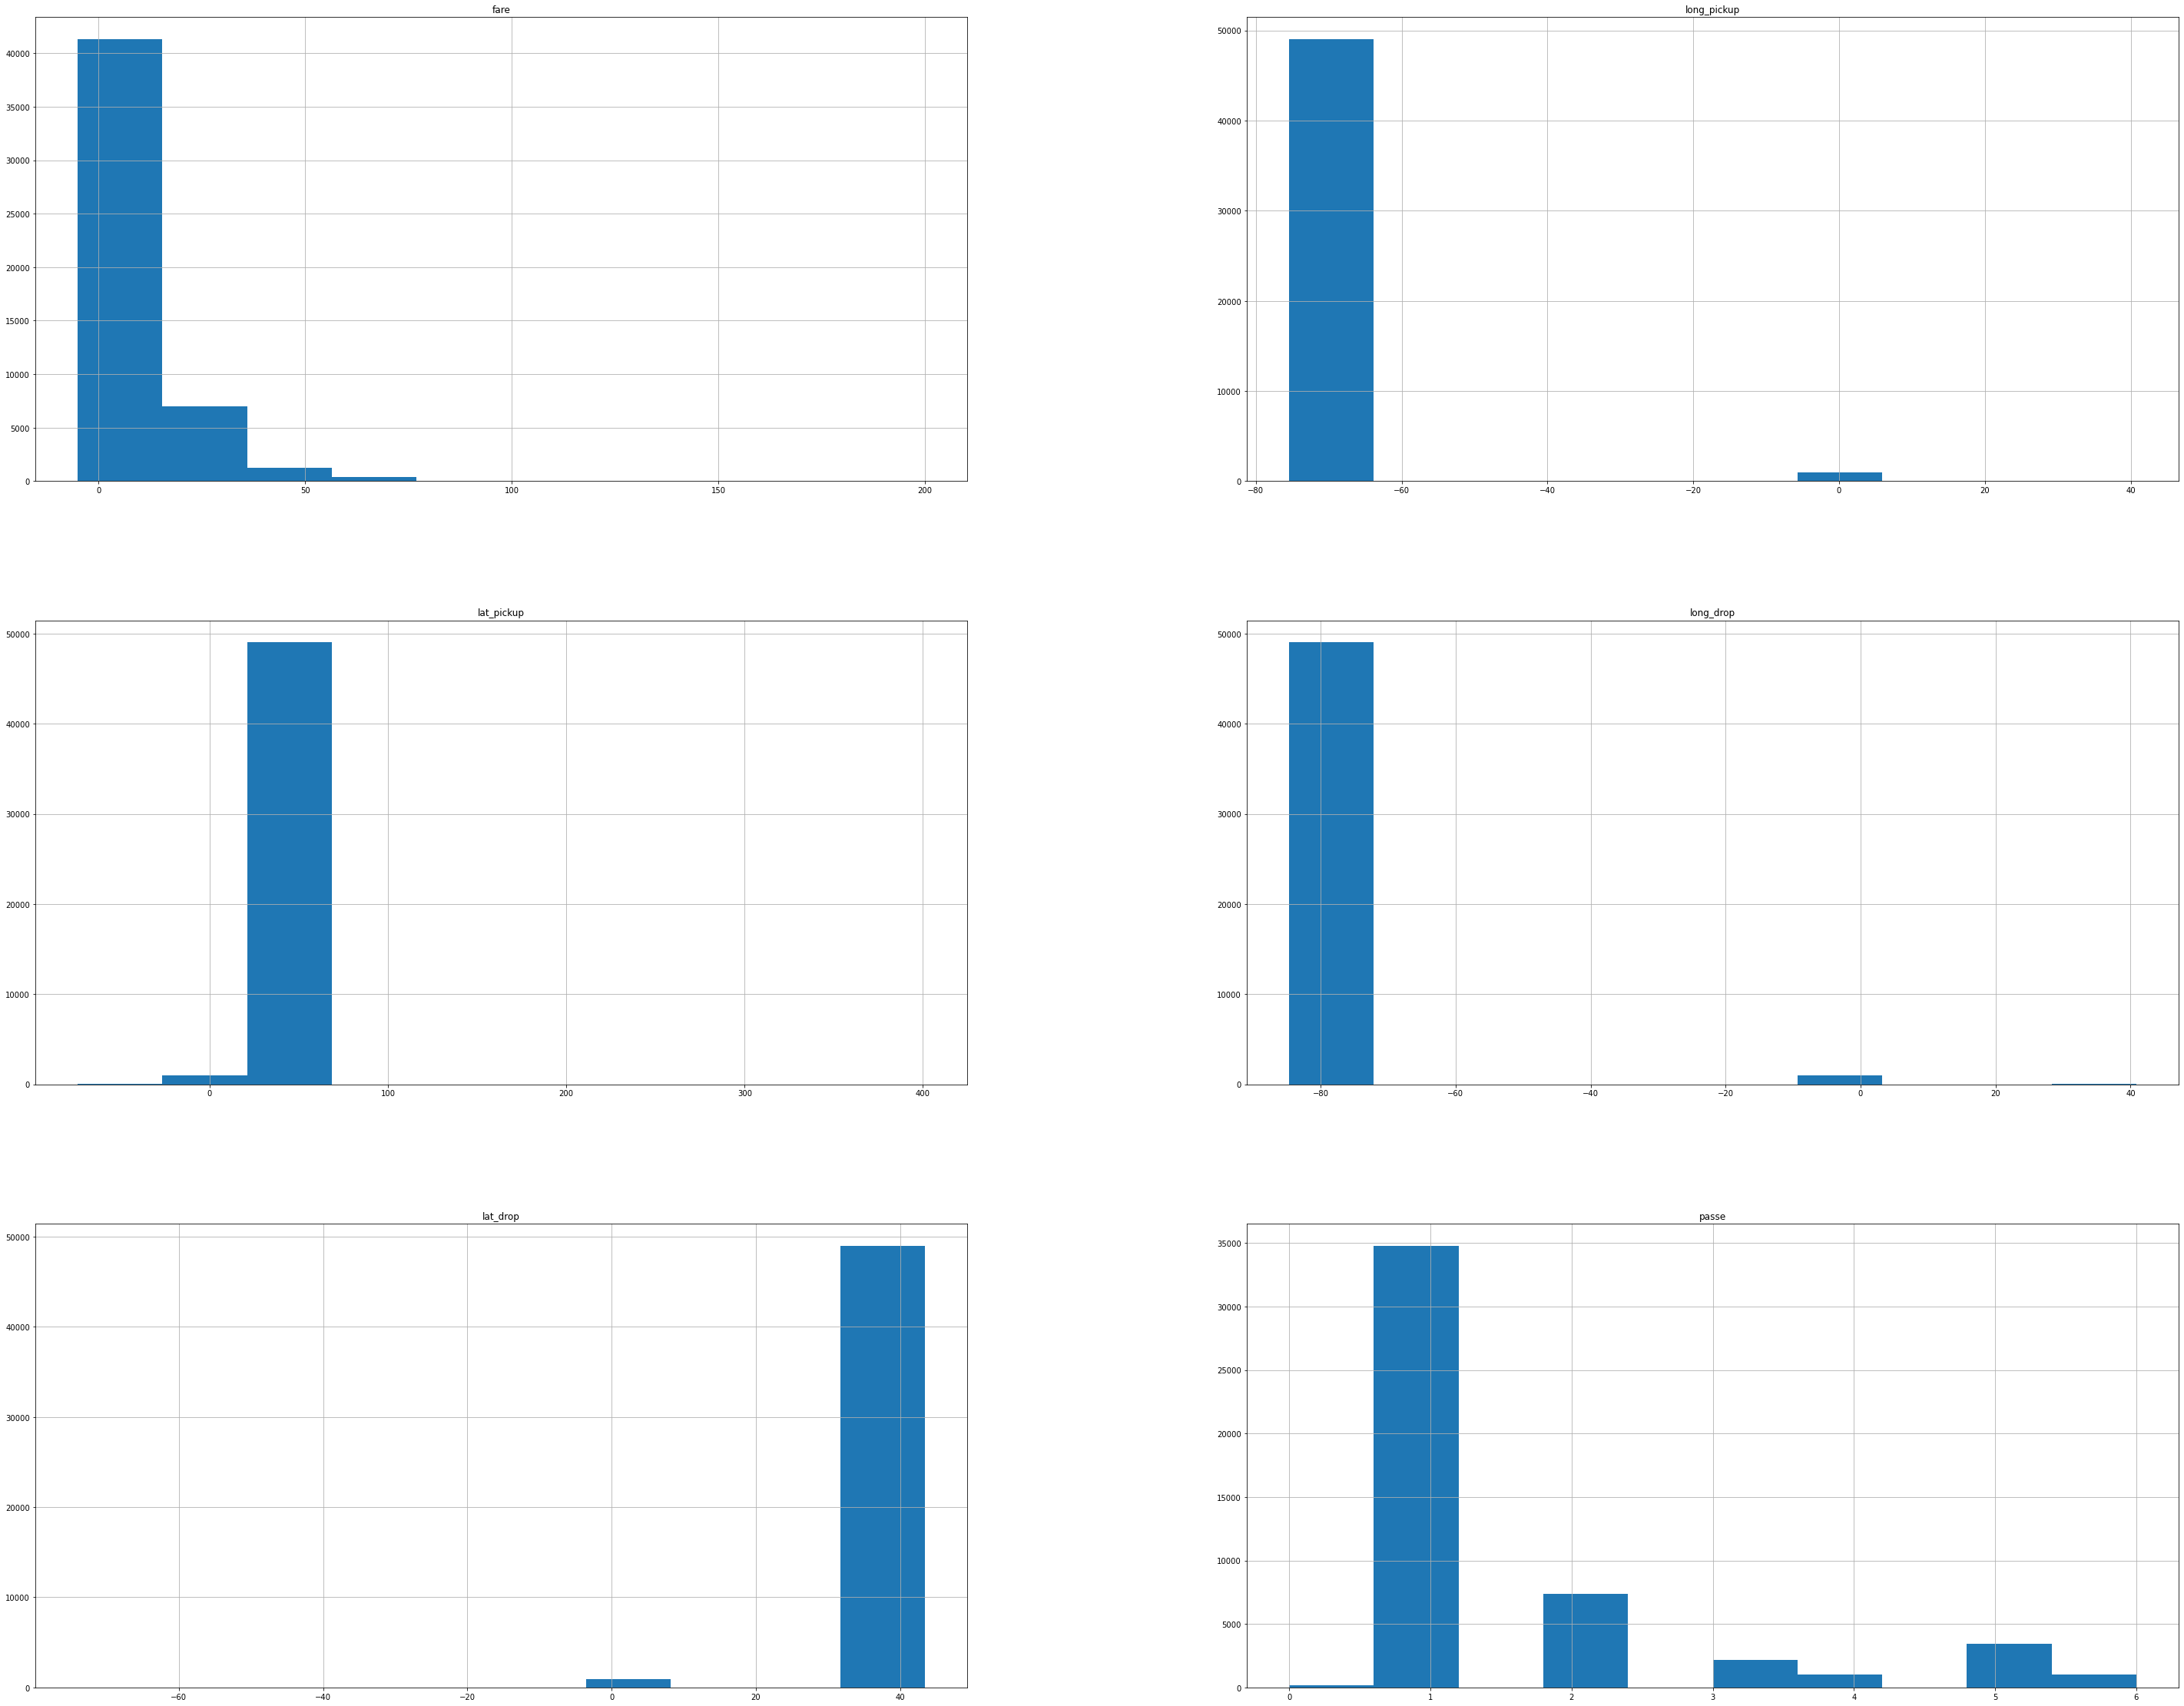

In [14]:
a=df1_numerical.hist(figsize=(50,40))

<b> Passenger Count

In [15]:
d1 = df1['passe'].value_counts()
d1

1    34808
2     7386
5     3453
3     2183
4     1016
6      989
0      165
Name: passe, dtype: int64

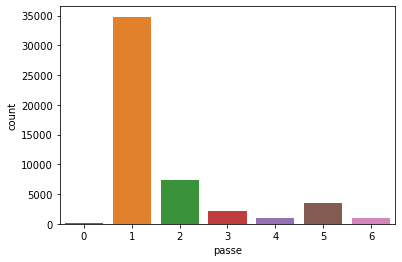

In [16]:
sns.countplot(x=df1['passe'])
plt.show()

#### Inference
- 165 rides have 0 passengers
- About 70% rides have solo passengers

<b> Correlation

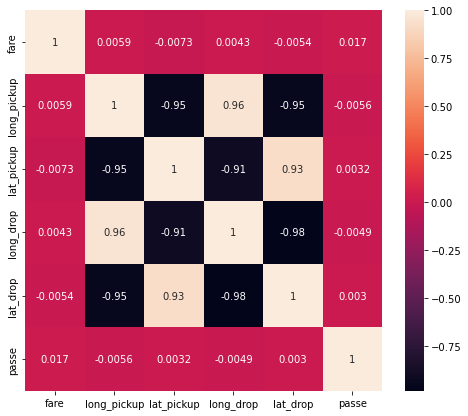

In [17]:
corr = df1.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr,annot=True)
plt.show()

- There is high correlation between columns .

<b> Fare

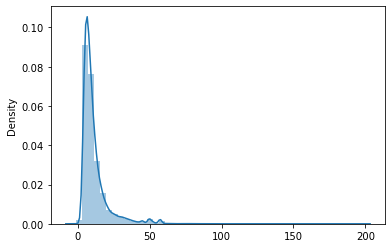

In [18]:
sns.distplot(x=df1['fare'])
plt.show()

In [19]:
df1['fare'].describe(percentiles=[0.01,0.02,0.98,0.99])

count    50000.000000
mean        11.364171
std          9.685557
min         -5.000000
1%           3.300000
2%           3.500000
50%          8.500000
98%         46.500000
99%         52.000000
max        200.000000
Name: fare, dtype: float64

In [20]:
print(df1[df1['fare']<3.3].shape)
print(df1[df1['fare']>52].shape)

(415, 8)
(498, 8)


###  Handling Outliers

<b> Fare

In [21]:
df1['fare'] = np.where(df1['fare']<3.30,3.30,df1['fare'])
df1['fare'] = np.where(df1['fare']>52.0,52.0,df1['fare'])
df1['fare'].describe(percentiles=[0.01,0.02,0.98,0.99])

count    50000.000000
mean        11.258561
std          8.971459
min          3.300000
1%           3.300000
2%           3.500000
50%          8.500000
98%         46.500000
99%         52.000000
max         52.000000
Name: fare, dtype: float64

### Notes
- Latitude ranges from -90 to 90
- Longitude ranges from -180 to 180

In [22]:
df1.columns

Index(['uid', 'fare', 'pickup_dt', 'long_pickup', 'lat_pickup', 'long_drop',
       'lat_drop', 'passe'],
      dtype='object')

#### Longitude

In [23]:
print(df1[df1['long_pickup']<-180].shape)
print(df1[df1['long_pickup']>180].shape)

print(df1[df1['long_drop']<-180].shape)
print(df1[df1['long_drop']>180].shape)

(0, 8)
(0, 8)
(0, 8)
(0, 8)


#### Latitude

In [24]:
print(df1[df1['lat_pickup']<-90].shape)
print(df1[df1['lat_pickup']>90].shape)

print(df1[df1['lat_drop']<-90].shape)
print(df1[df1['lat_drop']>90].shape)

(0, 8)
(1, 8)
(0, 8)
(0, 8)


In [25]:
df1.drop(df1[df1['lat_pickup']>90].index,axis=0,inplace=True)

In [26]:
df1.shape

(49999, 8)

In [27]:
df1[['long_pickup','long_drop','lat_pickup','lat_drop']].describe(percentiles=[0.98,0.99,0.01,0.02])

,long_pickup,long_drop,lat_pickup,lat_drop
count,49999.000000,49999.000000,49999.000000,49999.000000
mean,-72.509727,-72.504587,39.926536,39.926234
std,10.393962,10.407672,6.011729,6.014796
min,-75.423848,-84.654241,-74.006893,-74.006377
1%,-74.014444,-74.015120,0.000000,0.000000
2%,-74.010458,-74.011755,40.579934,40.564411
50%,-73.981840,-73.980083,40.752677,40.753371
98%,-73.137393,-73.422927,40.799637,40.810248
99%,0.000000,0.000000,40.807110,40.832502
max,40.783472,40.851027,43.098708,43.415190


### Co-ordinates of New York
40.7128° N, 74.0060° W
- Latitude	40.730610
- Longitude	-73.935242

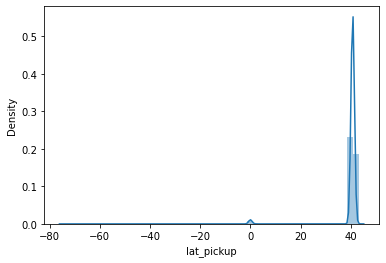

In [28]:
sns.distplot(df1['lat_pickup'])
plt.show()

In [29]:
coor_cols=['long_pickup','long_drop','lat_pickup','lat_drop']

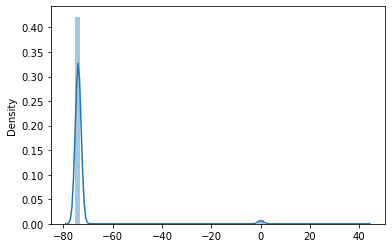

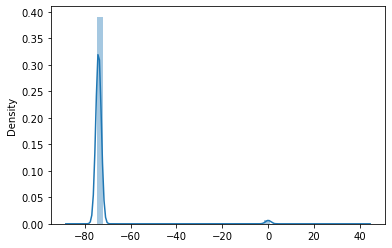

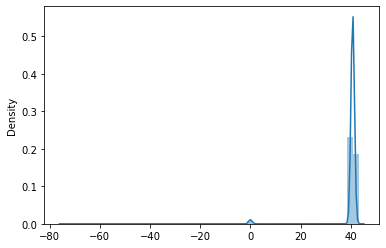

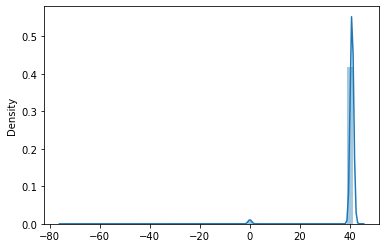

In [30]:
for i in coor_cols:
    sns.distplot(x=df1[i])
    plt.show()

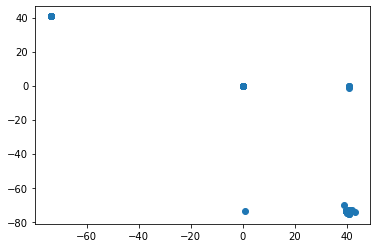

In [31]:
plt.scatter(df1['lat_pickup'],df1['long_pickup'])
plt.show()

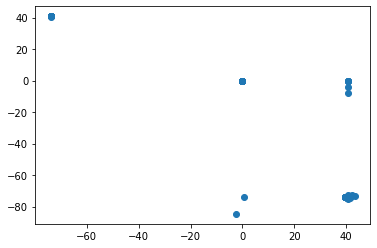

In [32]:
plt.scatter(df1['lat_drop'],df1['long_drop'])
plt.show()

#### Note
Minkowski's distance = (|x2-x1|^p + |y2-y1|^p)^(1/p) <br>
for p=2 => Eucliden Dist (x1,y1),(x2,y2) = sqrt((x2-x1)^2 + (y2-y1)^2) <br>
for p=1 => Manhattan Dist (x1,y1),(x2,y2) = |x2-x1| + |y2-y1|

In [33]:
def minkowski(x1,x2,y1,y2,p):
    min_dist=(abs(x2-x1)**p + abs(y2-y1)**p)**(1/p)
    return min_dist

In [34]:
df1['Euclid_dist']=minkowski(df1['lat_drop'],df1['lat_pickup'],df1['long_drop'],df1['long_pickup'],2)
df1['Manhattan_dist']=minkowski(df1['lat_drop'],df1['lat_pickup'],df1['long_drop'],df1['long_pickup'],1)

In [35]:
df1.head()

,uid,fare,pickup_dt,long_pickup,lat_pickup,long_drop,lat_drop,passe,Euclid_dist,Manhattan_dist
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.009436,0.011742
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.079696,0.107481
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.013674,0.019212
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.025340,0.029386
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.019470,0.027194


### Haversine Distance
We can calulate the distance in a sphere when latitudes and longitudes are given by Haversine formula

haversine(θ) = sin²(θ/2)

Eventually, the formual boils down to the following where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case). Latitude and longitude are measured in radians

a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)

c = 2 * atan2( √a, √(1−a) )

d = R ⋅ c

d = Haversine distance

In [36]:
def haversine_np(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c
    return km

In [37]:
df1['haversine_dist']=haversine_np(df1['long_pickup'],df1['lat_pickup'],df1['long_drop'],df1['lat_drop'])

In [38]:
df1.head()

,uid,fare,pickup_dt,long_pickup,lat_pickup,long_drop,lat_drop,passe,Euclid_dist,Manhattan_dist,haversine_dist
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.009436,0.011742,1.030764
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.079696,0.107481,8.450134
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.013674,0.019212,1.389525
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.025340,0.029386,2.799270
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.019470,0.027194,1.999157


In [39]:
df1['abs_diff_long']=abs(df1['long_drop']-df1['long_pickup'])
df1['abs_diff_lat']=abs(df1['lat_drop']-df1['lat_pickup'])

In [40]:
df1.head()

,uid,fare,pickup_dt,long_pickup,lat_pickup,long_drop,lat_drop,passe,Euclid_dist,Manhattan_dist,haversine_dist,abs_diff_long,abs_diff_lat
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.009436,0.011742,1.030764,0.002701,0.009041
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.079696,0.107481,8.450134,0.036780,0.070701
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.013674,0.019212,1.389525,0.008504,0.010708
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.025340,0.029386,2.799270,0.004437,0.024949
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.019470,0.027194,1.999157,0.011440,0.015754


In [41]:
df1['fare_bin']=pd.cut(df1['fare'],bins=list(range(0,60,5)))
df1.head()

,uid,fare,pickup_dt,long_pickup,lat_pickup,long_drop,lat_drop,passe,Euclid_dist,Manhattan_dist,haversine_dist,abs_diff_long,abs_diff_lat,fare_bin
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.009436,0.011742,1.030764,0.002701,0.009041,"(0, 5]"
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.079696,0.107481,8.450134,0.036780,0.070701,"(15, 20]"
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.013674,0.019212,1.389525,0.008504,0.010708,"(5, 10]"
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.025340,0.029386,2.799270,0.004437,0.024949,"(5, 10]"
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.019470,0.027194,1.999157,0.011440,0.015754,"(5, 10]"


In [42]:
df1['fare_bin'].value_counts()

(5, 10]     23437
(10, 15]     9959
(0, 5]       7703
(15, 20]     3681
(20, 25]     1643
(25, 30]      995
(30, 35]      774
(50, 55]      636
(35, 40]      429
(45, 50]      396
(40, 45]      346
Name: fare_bin, dtype: int64

## Model-1

In [43]:
df1.columns

Index(['uid', 'fare', 'pickup_dt', 'long_pickup', 'lat_pickup', 'long_drop',
       'lat_drop', 'passe', 'Euclid_dist', 'Manhattan_dist', 'haversine_dist',
       'abs_diff_long', 'abs_diff_lat', 'fare_bin'],
      dtype='object')

In [44]:
y=df1['fare']
x=df1[['passe', 'Euclid_dist', 'Manhattan_dist', 'haversine_dist',
       'abs_diff_long', 'abs_diff_lat']]

In [45]:
print(x.shape)
print(y.shape)

(49999, 6)
(49999,)


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(34999, 6)
(15000, 6)
(34999,)
(15000,)


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report,mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

In [49]:
def gen_metrics(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training Score',train_score)
    print('Testing Score',test_score)
    ypred = model.predict(x_test)
    mae = mean_absolute_error(y_test,ypred)
    mse = mean_squared_error(y_test,ypred)
    rmse = np.sqrt(mean_squared_error(y_test,ypred))
    r2s = r2_score(y_test,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2_Score',r2s)

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
m1= RandomForestRegressor(n_estimators=70,criterion='mse')
gen_metrics(m1,x_train,x_test,y_train,y_test)

Training Score 0.9354185816515959
Testing Score 0.7765833675088977
MAE 2.3888027211038305
MSE 17.55257617071637
RMSE 4.189579474209359
R2_Score 0.7765833675088977


In [52]:
fimp_m1= pd.DataFrame({'Features':x_train.columns,
                      'Norm_Imp':m1.feature_importances_})
fimp_m1.sort_values(by='Norm_Imp',ascending=False)

,Features,Norm_Imp
1,Euclid_dist,0.805329
4,abs_diff_long,0.052096
3,haversine_dist,0.050233
2,Manhattan_dist,0.043328
5,abs_diff_lat,0.039300
0,passe,0.009714


In [53]:
m2= RandomForestRegressor(n_estimators=70,criterion='mse',max_depth=7)
gen_metrics(m2,x_train,x_test,y_train,y_test)

Training Score 0.8178469063197118
Testing Score 0.7986321724042479
MAE 2.23586714578469
MSE 15.820326771539202
RMSE 3.9774774382187514
R2_Score 0.7986321724042479


In [54]:
fimp_m2= pd.DataFrame({'Features':x_train.columns,
                      'Norm_Imp':m2.feature_importances_})
fimp_m2.sort_values(by='Norm_Imp',ascending=False)

,Features,Norm_Imp
1,Euclid_dist,0.910562
4,abs_diff_long,0.032902
3,haversine_dist,0.024888
2,Manhattan_dist,0.019285
5,abs_diff_lat,0.010736
0,passe,0.001627


### Working on Date column

In [55]:
df1.head()

,uid,fare,pickup_dt,long_pickup,lat_pickup,long_drop,lat_drop,passe,Euclid_dist,Manhattan_dist,haversine_dist,abs_diff_long,abs_diff_lat,fare_bin
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.009436,0.011742,1.030764,0.002701,0.009041,"(0, 5]"
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.079696,0.107481,8.450134,0.036780,0.070701,"(15, 20]"
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.013674,0.019212,1.389525,0.008504,0.010708,"(5, 10]"
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.025340,0.029386,2.799270,0.004437,0.024949,"(5, 10]"
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.019470,0.027194,1.999157,0.011440,0.015754,"(5, 10]"


In [56]:
df1['year']=df1['pickup_dt'].dt.year
df1['quarter']=df1['pickup_dt'].dt.quarter
df1['month']=df1['pickup_dt'].dt.month

In [57]:
df1.head()

,uid,fare,pickup_dt,long_pickup,lat_pickup,long_drop,lat_drop,passe,Euclid_dist,Manhattan_dist,haversine_dist,abs_diff_long,abs_diff_lat,fare_bin,year,quarter,month
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.009436,0.011742,1.030764,0.002701,0.009041,"(0, 5]",2009,2,6
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.079696,0.107481,8.450134,0.036780,0.070701,"(15, 20]",2010,1,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.013674,0.019212,1.389525,0.008504,0.010708,"(5, 10]",2011,3,8
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.025340,0.029386,2.799270,0.004437,0.024949,"(5, 10]",2012,2,4
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.019470,0.027194,1.999157,0.011440,0.015754,"(5, 10]",2010,1,3


In [58]:
df1['hour']=df1['pickup_dt'].apply(lambda x:x.hour)
df1.head()

,uid,fare,pickup_dt,long_pickup,lat_pickup,long_drop,lat_drop,passe,Euclid_dist,Manhattan_dist,haversine_dist,abs_diff_long,abs_diff_lat,fare_bin,year,quarter,month,hour
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.009436,0.011742,1.030764,0.002701,0.009041,"(0, 5]",2009,2,6,17
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.079696,0.107481,8.450134,0.036780,0.070701,"(15, 20]",2010,1,1,16
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.013674,0.019212,1.389525,0.008504,0.010708,"(5, 10]",2011,3,8,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.025340,0.029386,2.799270,0.004437,0.024949,"(5, 10]",2012,2,4,4
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.019470,0.027194,1.999157,0.011440,0.015754,"(5, 10]",2010,1,3,7


In [59]:
df1['minute']=df1['pickup_dt'].apply(lambda x:x.minute)
df1.head()

,uid,fare,pickup_dt,long_pickup,lat_pickup,long_drop,lat_drop,passe,Euclid_dist,Manhattan_dist,haversine_dist,abs_diff_long,abs_diff_lat,fare_bin,year,quarter,month,hour,minute
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.009436,0.011742,1.030764,0.002701,0.009041,"(0, 5]",2009,2,6,17,26
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.079696,0.107481,8.450134,0.036780,0.070701,"(15, 20]",2010,1,1,16,52
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.013674,0.019212,1.389525,0.008504,0.010708,"(5, 10]",2011,3,8,0,35
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.025340,0.029386,2.799270,0.004437,0.024949,"(5, 10]",2012,2,4,4,30
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.019470,0.027194,1.999157,0.011440,0.015754,"(5, 10]",2010,1,3,7,51


In [60]:
h=df1.groupby(['hour'])['fare'].sum()
h.sort_values(ascending=False)

hour
18    33952.91
19    33315.39
22    30926.22
21    30870.17
20    30335.36
14    29525.87
13    28581.50
15    28037.83
17    27928.02
23    27834.50
12    27704.75
11    25825.42
9     24988.61
16    24751.32
10    24249.59
8     23300.00
0     22461.62
7     20871.88
1     17212.50
6     12333.18
2     12122.60
3      9893.39
4      8290.21
5      7611.93
Name: fare, dtype: float64

In [61]:
m=df1.groupby(['month'])['fare'].sum()
m.sort_values(ascending=False)

month
5     54001.37
3     51551.31
6     51413.48
4     50813.47
1     48259.00
2     46522.53
10    46375.96
12    46278.33
9     45199.64
11    43274.56
7     39694.00
8     39541.12
Name: fare, dtype: float64

In [62]:
y=df1.groupby(['year'])['fare'].sum()
y.sort_values(ascending=False)

year
2014    97304.29
2013    96025.44
2012    89033.90
2011    81666.47
2009    77159.24
2010    77100.96
2015    44634.47
Name: fare, dtype: float64

In [63]:
df1['Day_Q1'] = np.where((df1['hour']>0) & (df1['hour']<=6),1,0)
df1['Day_Q2'] = np.where((df1['hour']>6) & (df1['hour']<=12),1,0)
df1['Day_Q3'] = np.where((df1['hour']>12) & (df1['hour']<=18),1,0)
df1['Day_Q4'] = np.where((df1['hour']>18) & (df1['hour']<=0),1,0)
df1.head()

,uid,fare,pickup_dt,long_pickup,lat_pickup,long_drop,lat_drop,passe,Euclid_dist,Manhattan_dist,...,fare_bin,year,quarter,month,hour,minute,Day_Q1,Day_Q2,Day_Q3,Day_Q4
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.009436,0.011742,...,"(0, 5]",2009,2,6,17,26,0,0,1,0
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.079696,0.107481,...,"(15, 20]",2010,1,1,16,52,0,0,1,0
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.013674,0.019212,...,"(5, 10]",2011,3,8,0,35,0,0,0,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.025340,0.029386,...,"(5, 10]",2012,2,4,4,30,1,0,0,0
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.019470,0.027194,...,"(5, 10]",2010,1,3,7,51,0,1,0,0


## Model-2

In [64]:
df1.columns

Index(['uid', 'fare', 'pickup_dt', 'long_pickup', 'lat_pickup', 'long_drop',
       'lat_drop', 'passe', 'Euclid_dist', 'Manhattan_dist', 'haversine_dist',
       'abs_diff_long', 'abs_diff_lat', 'fare_bin', 'year', 'quarter', 'month',
       'hour', 'minute', 'Day_Q1', 'Day_Q2', 'Day_Q3', 'Day_Q4'],
      dtype='object')

In [65]:
x1=df1[['passe', 'Euclid_dist', 'Manhattan_dist', 'haversine_dist',
       'abs_diff_long', 'abs_diff_lat', 'year', 'quarter', 'month',
       'hour', 'minute', 'Day_Q1', 'Day_Q2', 'Day_Q3', 'Day_Q4']]

In [66]:
y1=df1['fare']

In [67]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.30,random_state=10)
print(x1_train.shape)
print(x1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(34999, 15)
(15000, 15)
(34999,)
(15000,)


In [68]:
m3= RandomForestRegressor(n_estimators=40,criterion='mse')
gen_metrics(m3,x1_train,x1_test,y1_train,y1_test)

Training Score 0.9707631093770875
Testing Score 0.8000376071249291
MAE 2.1035773
MSE 15.709909746125
RMSE 3.963572851118672
R2_Score 0.8000376071249291


## Analyzing Multiple Model Performance

### Linear regression

In [69]:
import statsmodels.api as sm

In [70]:
lin_reg_model = sm.OLS(y1_train, x1_train).fit()
print(lin_reg_model.summary())
y_pred_lin_reg = lin_reg_model.predict(x1_test)

                                 OLS Regression Results                                
Dep. Variable:                   fare   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.646
Method:                 Least Squares   F-statistic:                              4924.
Date:                Sun, 24 Jul 2022   Prob (F-statistic):                        0.00
Time:                        17:51:36   Log-Likelihood:                     -1.2491e+05
No. Observations:               34999   AIC:                                  2.498e+05
Df Residuals:                   34986   BIC:                                  2.500e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

### SGD

In [71]:
from sklearn.linear_model import SGDRegressor

In [72]:
sgd = SGDRegressor(random_state = 10)
sgd_model = sgd.fit(x1_train,y1_train)
y_pred_sgd = sgd_model.predict(x1_test)

In [73]:
gen_metrics(sgd_model,x1_train,x1_test,y1_train,y1_test)

Training Score -1.439930303714377e+28
Testing Score -1.480721980520826e+28
MAE 907274001265078.2
MSE 1.1633191791027861e+30
RMSE 1078572750955069.4
R2_Score -1.480721980520826e+28


### Decision Tree

In [74]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [75]:
dt = DecisionTreeRegressor(max_depth = 7, max_leaf_nodes= 30)
dt_model = dt.fit(x1_train,y1_train)
y_pred_dt = dt_model.predict(x1_test)
gen_metrics(dt_model,x1_train,x1_test,y1_train,y1_test)

Training Score 0.8067388401311961
Testing Score 0.8009412980520022
MAE 2.2076244041214093
MSE 15.638911881483617
RMSE 3.9546064129674923
R2_Score 0.8009412980520022


In [76]:
from sklearn.tree import plot_tree,export_text

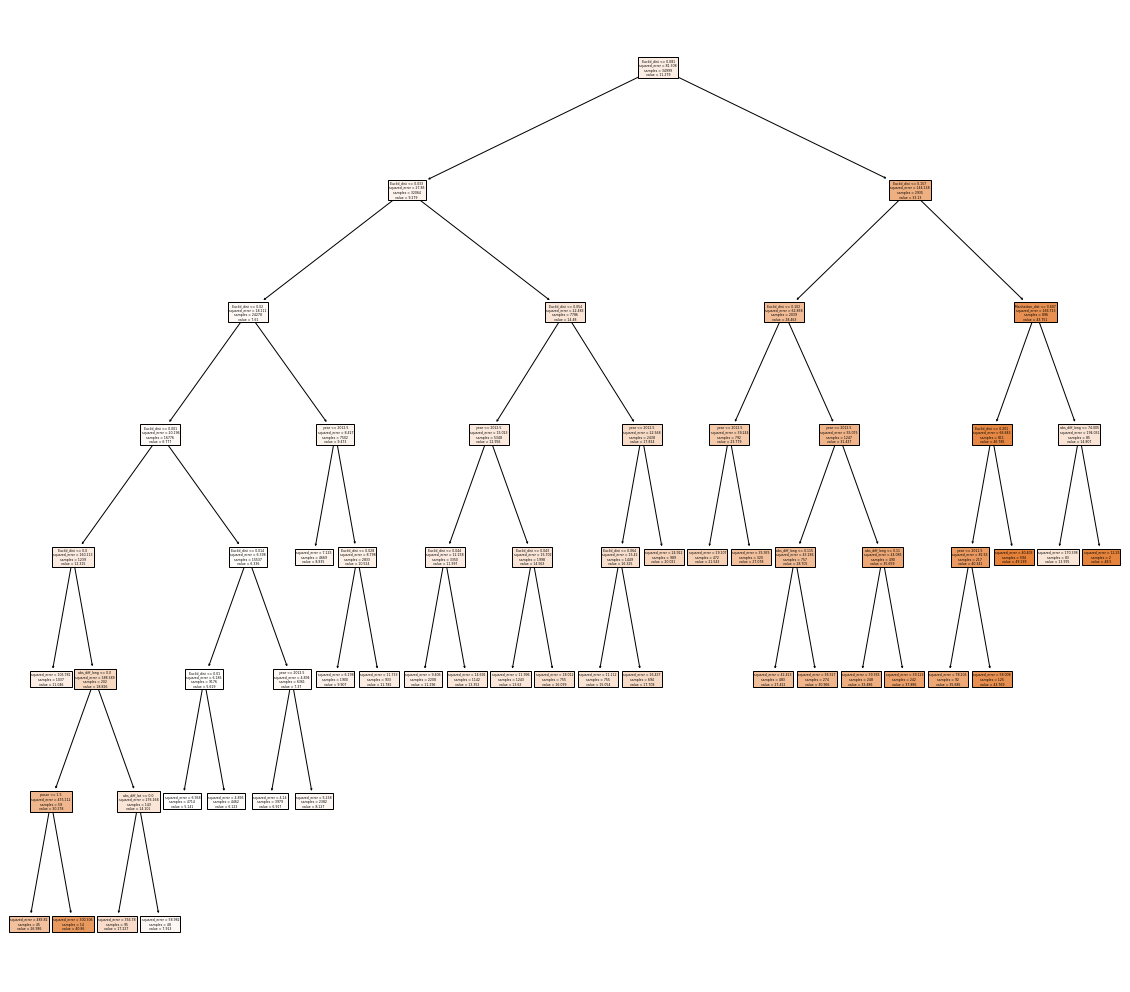

In [77]:
plt.figure(figsize=(20,18))
plot_tree(dt_model,feature_names=x1_train.columns,filled=True)
plt.show()

### Grid Search

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
tuned_parameters_dt = {"max_depth":[3,5,7,9,10],
                   "max_leaf_nodes":[15,20,25,30,35]}
dt_est = DecisionTreeRegressor(random_state = 10)
grid_tree = GridSearchCV(dt_est,param_grid = tuned_parameters_dt, cv= 10)
dt_grid = grid_tree.fit(x1_train, y1_train)

In [80]:
print("Hyper Parameters:", dt_grid.best_params_)

Hyper Parameters: {'max_depth': 7, 'max_leaf_nodes': 35}


In [81]:
dt_gscv = DecisionTreeRegressor(max_depth = dt_grid.best_params_.get("max_depth"),
                                max_leaf_nodes= dt_grid.best_params_.get("max_leaf_nodes"))
dt_gscv_model = dt_gscv.fit(x1_train,y1_train)
y_pred_dt_gscv = dt_gscv_model.predict(x1_test)

In [82]:
gen_metrics(dt_gscv_model,x1_train,x1_test,y1_train,y1_test)

Training Score 0.8102224857239564
Testing Score 0.8026557056880173
MAE 2.1890896434943072
MSE 15.504220608576667
RMSE 3.937539918347072
R2_Score 0.8026557056880173


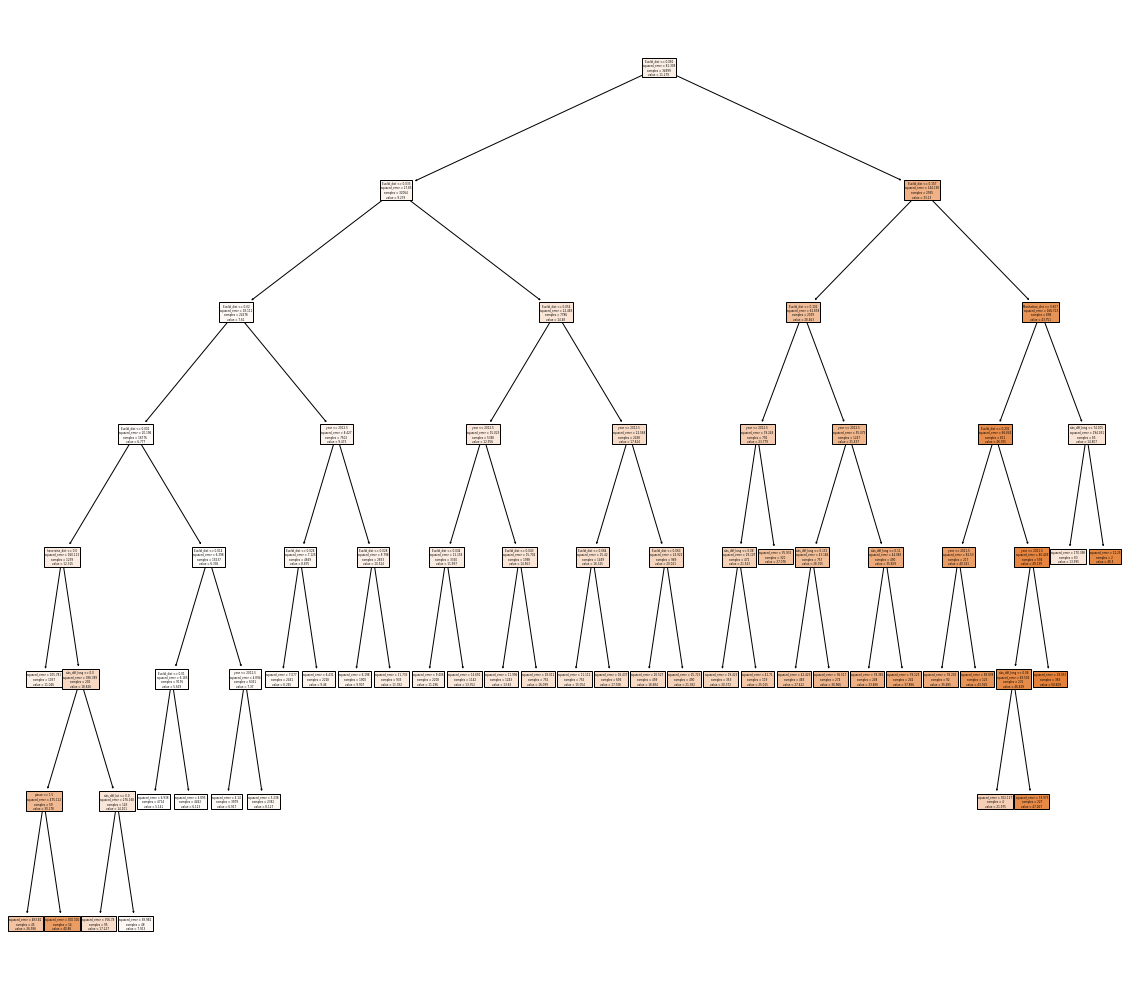

In [83]:
plt.figure(figsize=(20,18))
plot_tree(dt_gscv_model,feature_names=x1_train.columns,filled=True)
plt.show()

### Random Forest

In [84]:
rf = RandomForestRegressor(max_depth = 7, max_leaf_nodes= 30, n_estimators = 100)
rf_model = rf.fit(x1_train,y1_train)
y_pred_rf = rf_model.predict(x1_test)

In [85]:
gen_metrics(rf_model,x1_train,x1_test,y1_train,y1_test)

Training Score 0.815301814876397
Testing Score 0.8084155994789077
MAE 2.152457517848267
MSE 15.051698460281067
RMSE 3.879651847818444
R2_Score 0.8084155994789077


### Grid Search

In [86]:
tuned_parameters_rf = {"n_estimators":[80,100,120],
                       "max_depth":[3,5,7,9,10],
                   "max_leaf_nodes":[15,20,25,30,35]}
rf_est = RandomForestRegressor(random_state = 10)
grid_tree = GridSearchCV(rf_est,param_grid = tuned_parameters_rf, cv= 10)
rf_grid = grid_tree.fit(x1_train, y1_train)

In [87]:
print("Hyper paramters:", rf_grid.best_params_)

Hyper paramters: {'max_depth': 7, 'max_leaf_nodes': 35, 'n_estimators': 100}


In [88]:
rf_gscv = RandomForestRegressor(max_depth = rf_grid.best_params_.get("max_depth"),
                           max_leaf_nodes= rf_grid.best_params_.get("max_leaf_nodes"),
                           n_estimators = rf_grid.best_params_.get("n_estimators"))
rf_gscv_model = rf_gscv.fit(x1_train,y1_train)
y_pred_rf_gscv = rf_gscv_model.predict(x1_test)

In [89]:
gen_metrics(rf_gscv_model,x1_train,x1_test,y1_train,y1_test)

Training Score 0.8185579200489785
Testing Score 0.8093538199697917
MAE 2.1388021493350227
MSE 14.977987803882986
RMSE 3.870140540585443
R2_Score 0.8093538199697917


## Results

In [91]:
from math import sqrt

In [92]:
models=pd.DataFrame({"Model Name":["OLS Model", "SGD Model", "Decision Tree Model",
                           "Optimised Decision Tree Model","Random Forest Model",
                           "Optimised Random Forest Model"],
             "R-Squared":[lin_reg_model.rsquared, sgd.score(x1_train,y1_train),
                          dt.score(x1_train,y1_train),dt_gscv.score(x1_train,y1_train),
                          rf.score(x1_train,y1_train), rf_gscv.score(x1_train,y1_train)],
             "RMSE":[sqrt(mean_squared_error(y1_test,y_pred_lin_reg)),sqrt(mean_squared_error(y1_test,y_pred_sgd)),
                    sqrt(mean_squared_error(y1_test,y_pred_dt)),sqrt(mean_squared_error(y1_test,y_pred_dt_gscv)),
                    sqrt(mean_squared_error(y1_test,y_pred_rf)),sqrt(mean_squared_error(y1_test,y_pred_rf_gscv))]})
models

,Model Name,R-Squared,RMSE
0,OLS Model,6.465786e-01,8.229612e+00
1,SGD Model,-1.439930e+28,1.078573e+15
2,Decision Tree Model,8.067388e-01,3.954606e+00
3,Optimised Decision Tree Model,8.102225e-01,3.937540e+00
4,Random Forest Model,8.153018e-01,3.877806e+00
5,Optimised Random Forest Model,8.185579e-01,3.866576e+00


#### Removing SGD model since it results low r-squared value 

In [96]:
models=pd.DataFrame({"Model Name":["OLS Model", "Decision Tree Model",
                           "Optimised Decision Tree Model","Random Forest Model",
                           "Optimised Random Forest Model"],
             "R-Squared":[lin_reg_model.rsquared,
                          dt.score(x1_train,y1_train),dt_gscv.score(x1_train,y1_train),
                          rf.score(x1_train,y1_train), rf_gscv.score(x1_train,y1_train)],
             "RMSE":[sqrt(mean_squared_error(y1_test,y_pred_lin_reg)),
                    sqrt(mean_squared_error(y1_test,y_pred_dt)),sqrt(mean_squared_error(y1_test,y_pred_dt_gscv)),
                    sqrt(mean_squared_error(y1_test,y_pred_rf)),sqrt(mean_squared_error(y1_test,y_pred_rf_gscv))]})
models

,Model Name,R-Squared,RMSE
0,OLS Model,0.646579,8.229612
1,Decision Tree Model,0.806739,3.954606
2,Optimised Decision Tree Model,0.810222,3.937540
3,Random Forest Model,0.815302,3.877806
4,Optimised Random Forest Model,0.818558,3.866576


### Conclusion
- Optimised Random Forest Model performs the best.